In [1]:
%matplotlib inline
from PIL import Image

filename = "../image/20210523175714.jpg"
image = Image.open(filename)


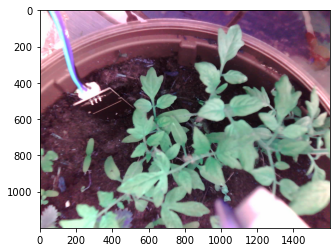

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plantcv import plantcv as pcv
img,f,r = pcv.readimage(filename, mode='rgb')
plt.imshow(img)

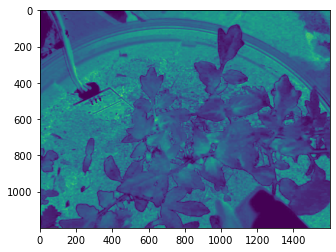

In [3]:

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

plt.imshow(s)

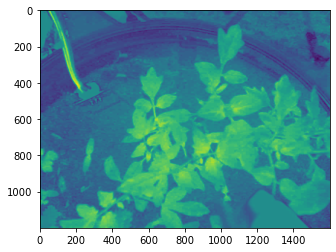

In [4]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
plt.imshow(b)

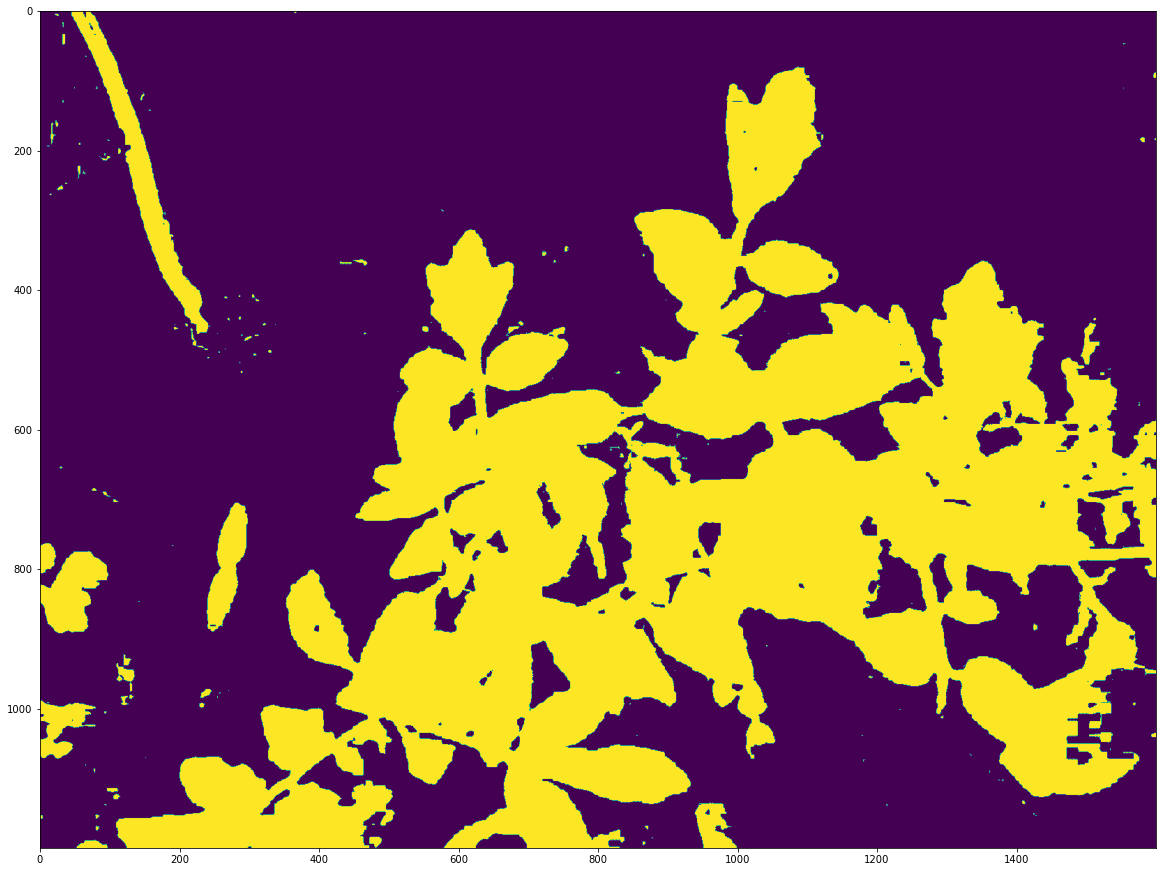

In [5]:
b_thresh = pcv.threshold.binary(gray_img=b, threshold=130, max_value=255, 
                                    object_type='light')
b_cnt = pcv.threshold.binary(gray_img=b, threshold=130, max_value=255, 
                                 object_type='light')
plt.figure(figsize = (20,30))
plt.imshow(b_thresh)

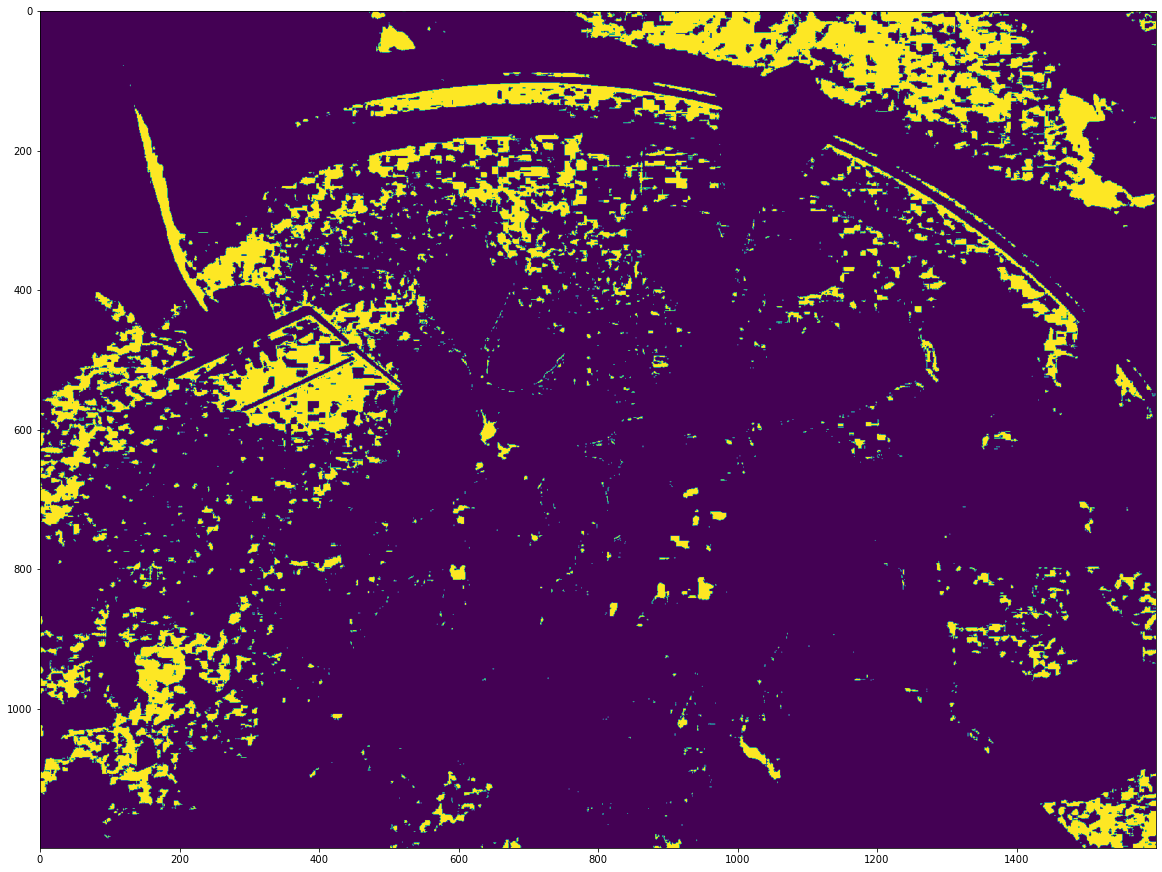

In [6]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=130, max_value=255, object_type='light')
plt.figure(figsize = (20,20))
plt.imshow(s_thresh)

In [7]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)

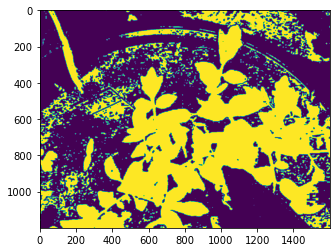

In [8]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)
plt.imshow(bs)

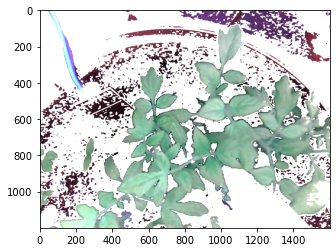

In [9]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')
plt.imshow(masked)

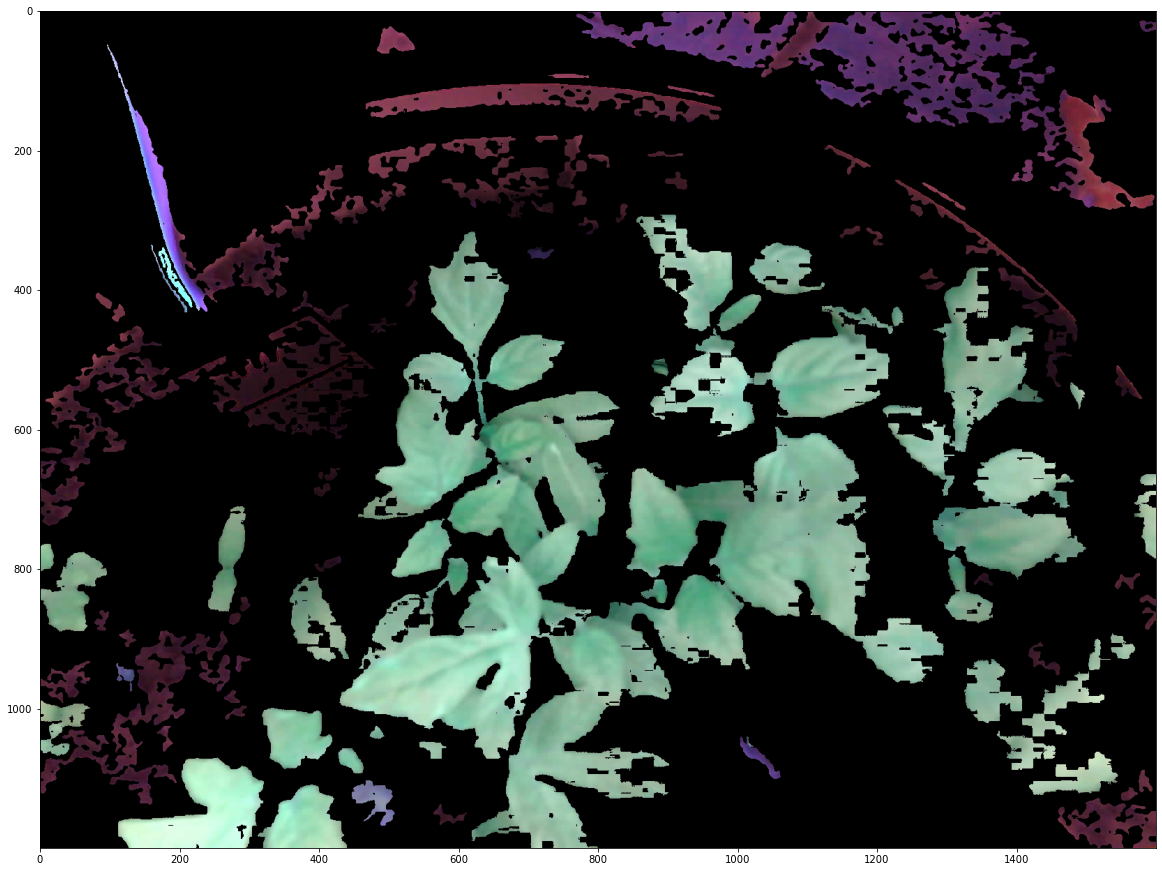

In [10]:
    # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
    masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
    masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

    # Threshold the green-magenta and blue images
    maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
    maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                           max_value=255, object_type='light')
    maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=200, 
                                          max_value=255, object_type='light')

    # Join the thresholded saturation and blue-yellow images (OR)
    ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
    ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

    # Fill small objects
    # Inputs: 
    #   bin_img - Binary image data 
    #   size - Minimum object area size in pixels (must be an integer), and smaller objects will be filled
    ab_fill = pcv.fill(bin_img=ab, size=200)

    # Apply mask (for VIS images, mask_color=white)
    masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='black')
    plt.figure(figsize = (20,30))
    plt.imshow(masked2)

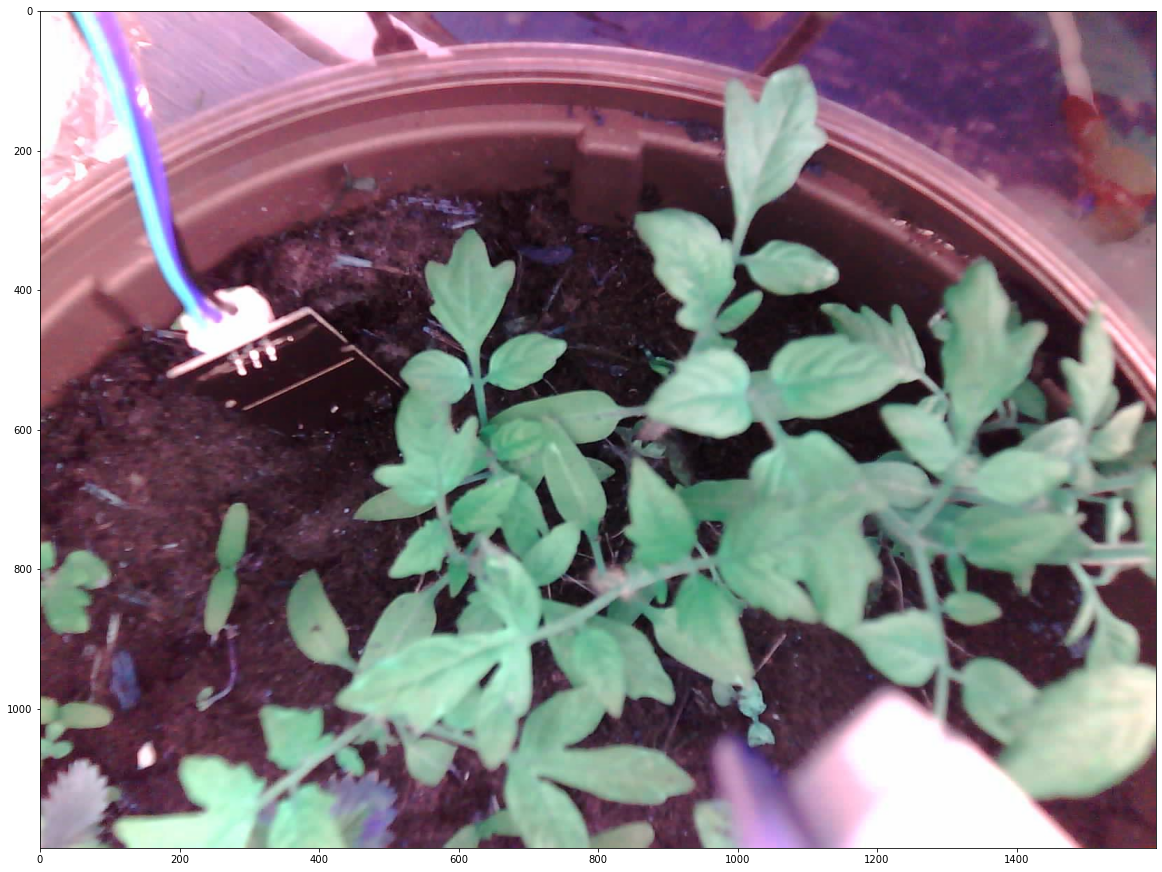

In [11]:
# original image
plt.figure(figsize=(20,20))
plt.imshow(img)

In [12]:
import numpy as np
shape = np.shape(masked2)
# print(masked2)

In [13]:
nonblack = np.array([x > 0 for x in masked2])
#print(nonblack * 1)


indice = np.sum(nonblack) / 3
print(indice)


561195.6666666666
